In [27]:
import pandas as pd
import numpy as np

df = pd.read_csv('dataset/Assignment1-data.csv')
df


,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0
...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0


In [28]:
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [29]:
from pandas_profiling import ProfileReport
import seaborn as sns
import matplotlib.style
import matplotlib as mpl

mpl.style.use('classic')

sns.set_theme(style="whitegrid", palette="pastel")

#defining the library
profile = ProfileReport(df)
# exporting your report as a html file
profile.to_file(output_file='report_1.html')


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/pondspective/Library/Python/3.8/lib/python/site-packages/multimethod/__init__.py:315: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  return func(*args, **kwargs)


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [30]:
df.isna().sum()*100/len(df)

ID                  0.000000
Gender              0.000000
Ever_Married        1.735250
Age                 0.000000
Graduated           0.966782
Profession          1.536936
Work_Experience    10.275161
Spending_Score      0.000000
Family_Size         4.152206
dtype: float64

In [31]:
# dictionary for grouping profession
career_group = {
    'Artist' : 'Entertainment',
    'Entertainment' : 'Entertainment',
    'Doctor' : 'Healthcare',
    'Healthcare' : 'Healthcare',
    'Engineer' : 'Engineer',
    'Lawyer' : 'Lawyer',
    'Executive' : 'Self-Employed',
    'Homemaker' : 'Self-Employed',
    'Marketing' : 'Other'
}

df['Profession'].fillna('', inplace=True)
df['career_group'] = df['Profession'].apply(lambda x: career_group[x] if x != '' else 'Other')

In [32]:
df.groupby('career_group').count().iloc[:,0]

career_group
Engineer          699
Entertainment    3465
Healthcare       2020
Lawyer            623
Other             416
Self-Employed     845
Name: ID, dtype: int64

In [42]:
# Drop null data work experience
df_clean = df.dropna(subset=['Work_Experience', 'Ever_Married', 'Profession', 'Family_Size', 'Graduated'])
df_clean['is_male'] = df_clean['Gender'].apply(lambda gender: 1 if gender == 'Male' else 0)
df_clean['is_married'] = df_clean['Ever_Married'].apply(lambda is_married: 1 if is_married == 'Yes' else 0)
df_clean['is_graduated'] = df_clean['Graduated'].apply(lambda is_grad: 1 if is_grad == 'Yes' else 0)

spending_score = {
    'Low':0
    ,'Average':1
    ,'High':2
}

df_clean['spending_score_ohc'] = df_clean['Spending_Score'].apply(lambda x: spending_score[x])
df_clean.drop(columns=['Gender','Ever_Married','Graduated','Profession','Spending_Score','ID'], inplace=True)
df_clean

/var/folders/2z/gx0h09yd43nb0t7ydmys7xnw0000gn/T/ipykernel_70071/46662237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['is_male'] = df_clean['Gender'].apply(lambda gender: 1 if gender == 'Male' else 0)
/var/folders/2z/gx0h09yd43nb0t7ydmys7xnw0000gn/T/ipykernel_70071/46662237.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['is_married'] = df_clean['Ever_Married'].apply(lambda is_married: 1 if is_married == 'Yes' else 0)
/var/folders/2z/gx0h09yd43nb0t7ydmys7xnw0000gn/T/ipykernel_7

,Age,Work_Experience,Family_Size,career_group,is_male,is_married,is_graduated,spending_score_ohc
0,22,1.0,4.0,Healthcare,1,0,0,0
2,67,1.0,1.0,Engineer,0,1,1,0
3,67,0.0,2.0,Lawyer,1,1,1,2
5,56,0.0,2.0,Entertainment,1,1,0,1
6,32,1.0,3.0,Healthcare,1,0,1,0
...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,Other,1,0,0,0
8064,35,3.0,4.0,Self-Employed,1,0,0,0
8065,33,1.0,1.0,Healthcare,0,0,1,0
8066,27,1.0,4.0,Healthcare,0,0,1,0


In [52]:
careers = list(df_clean['career_group'].unique())
careers.remove('Other')

for c in careers:
    df_clean[f'career_{c}'] = df_clean['career_group'].apply(lambda x: 1 if x == c else 0)

df_clean.drop(columns=['career_group'], inplace=True)


/var/folders/2z/gx0h09yd43nb0t7ydmys7xnw0000gn/T/ipykernel_70071/1492473837.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean[f'career_{c}'] = df_clean['career_group'].apply(lambda x: 1 if x == c else 0)
/var/folders/2z/gx0h09yd43nb0t7ydmys7xnw0000gn/T/ipykernel_70071/1492473837.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean.drop(columns=['career_group'], inplace=True)


## Scale Data

In [59]:
from sklearn.preprocessing import StandardScaler

X = df_clean.values
X.shape
std_scale = StandardScaler()
std_scale.fit(X)
X_scaled = std_scale.transform(X)
X_scaled

array([[-1.30356544, -0.47732116,  0.7603826 , ..., -0.28251713,
        -0.89484129, -0.33509939],
       [ 1.42299171, -0.47732116, -1.20707123, ..., -0.28251713,
        -0.89484129, -0.33509939],
       [ 1.42299171, -0.77135306, -0.55125329, ...,  3.53960832,
        -0.89484129, -0.33509939],
       ...,
       [-0.63707369, -0.47732116, -1.20707123, ..., -0.28251713,
        -0.89484129, -0.33509939],
       [-1.00061464, -0.47732116,  0.7603826 , ..., -0.28251713,
        -0.89484129, -0.33509939],
       [-0.39471305, -0.77135306,  0.10456465, ..., -0.28251713,
        -0.89484129,  2.98418929]])

## Elbow Method

/Users/pondspective/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pondspective/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pondspective/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/pondspective/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress t

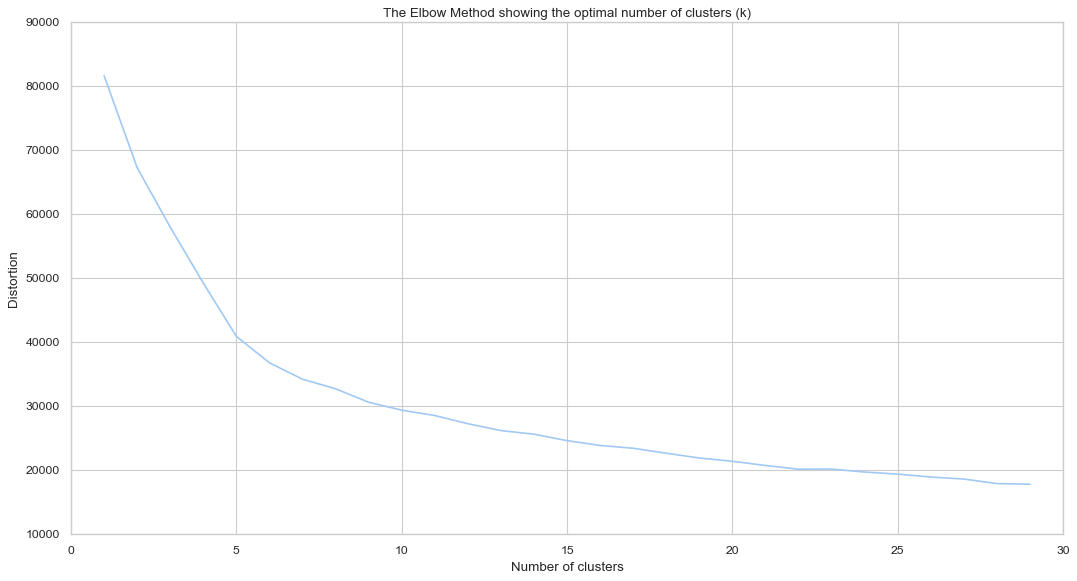

In [62]:
# import libraries
from sklearn.cluster import KMeans, DBSCAN
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt



# Create Elbow Plot
w = []
K = range(1,30)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(X_scaled)
    w.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, w)
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal number of clusters (k)')

plt.show()

## K-mean

In [63]:
X = X_scaled
num_clusters=5
kmeanModel = KMeans(n_clusters=num_clusters, random_state=112)
kmeanModel.fit(X)
y_pred = kmeanModel.predict(X)
df_clean['pred_cluster'] = y_pred

/Users/pondspective/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/var/folders/2z/gx0h09yd43nb0t7ydmys7xnw0000gn/T/ipykernel_70071/2970596474.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['pred_cluster'] = y_pred


In [68]:
df_merge = pd.merge(df_clean, df[['Gender','Ever_Married','Graduated','career_group','Spending_Score']], how='left', left_index=True, right_index=True)
df_merge.to_csv('predicted1.csv')

In [70]:
df_merge

,Age,Work_Experience,Family_Size,is_male,is_married,is_graduated,spending_score_ohc,career_Healthcare,career_Engineer,career_Lawyer,career_Entertainment,career_Self-Employed,pred_cluster,Gender,Ever_Married,Graduated,career_group,Spending_Score
0,22,1.0,4.0,1,0,0,0,1,0,0,0,0,4,Male,No,No,Healthcare,Low
2,67,1.0,1.0,0,1,1,0,0,1,0,0,0,2,Female,Yes,Yes,Engineer,Low
3,67,0.0,2.0,1,1,1,2,0,0,1,0,0,3,Male,Yes,Yes,Lawyer,High
5,56,0.0,2.0,1,1,0,1,0,0,0,1,0,1,Male,Yes,No,Entertainment,Average
6,32,1.0,3.0,1,0,1,0,1,0,0,0,0,4,Male,No,Yes,Healthcare,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8063,22,0.0,7.0,1,0,0,0,0,0,0,0,0,4,Male,No,No,Other,Low
8064,35,3.0,4.0,1,0,0,0,0,0,0,0,1,0,Male,No,No,Self-Employed,Low
8065,33,1.0,1.0,0,0,1,0,1,0,0,0,0,4,Female,No,Yes,Healthcare,Low
8066,27,1.0,4.0,0,0,1,0,1,0,0,0,0,4,Female,No,Yes,Healthcare,Low


<BarContainer object of 5 artists>

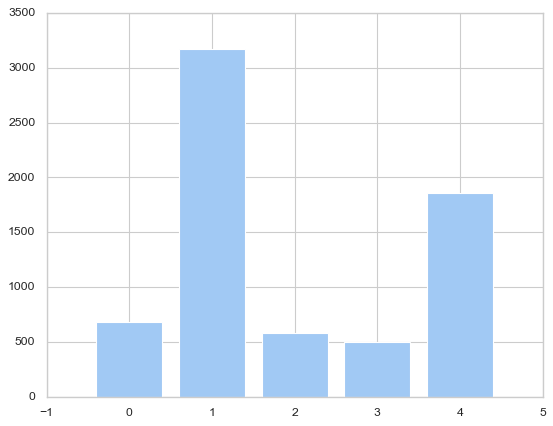

In [71]:
plt.bar(x=df_merge.groupby('pred_cluster').count()['Age'].index, height=df_merge.groupby('pred_cluster').count()['Age'])

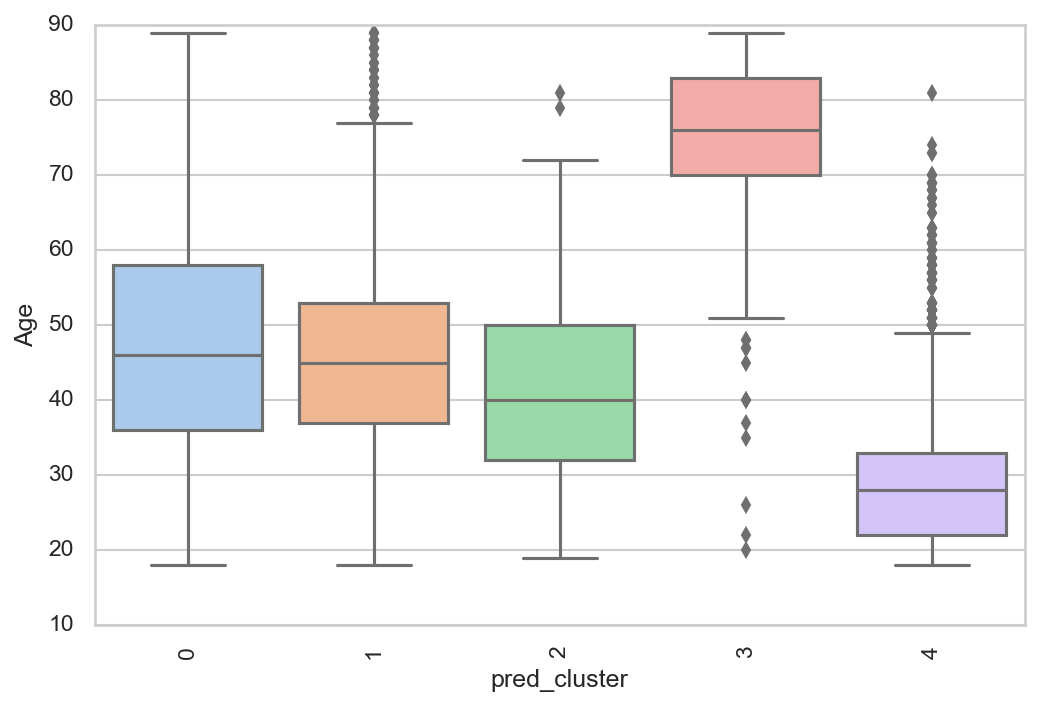

In [69]:
plt.figure(figsize=(8, 5), dpi=150)
ax = sns.boxplot(x="pred_cluster", y="Age", data=df_merge)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

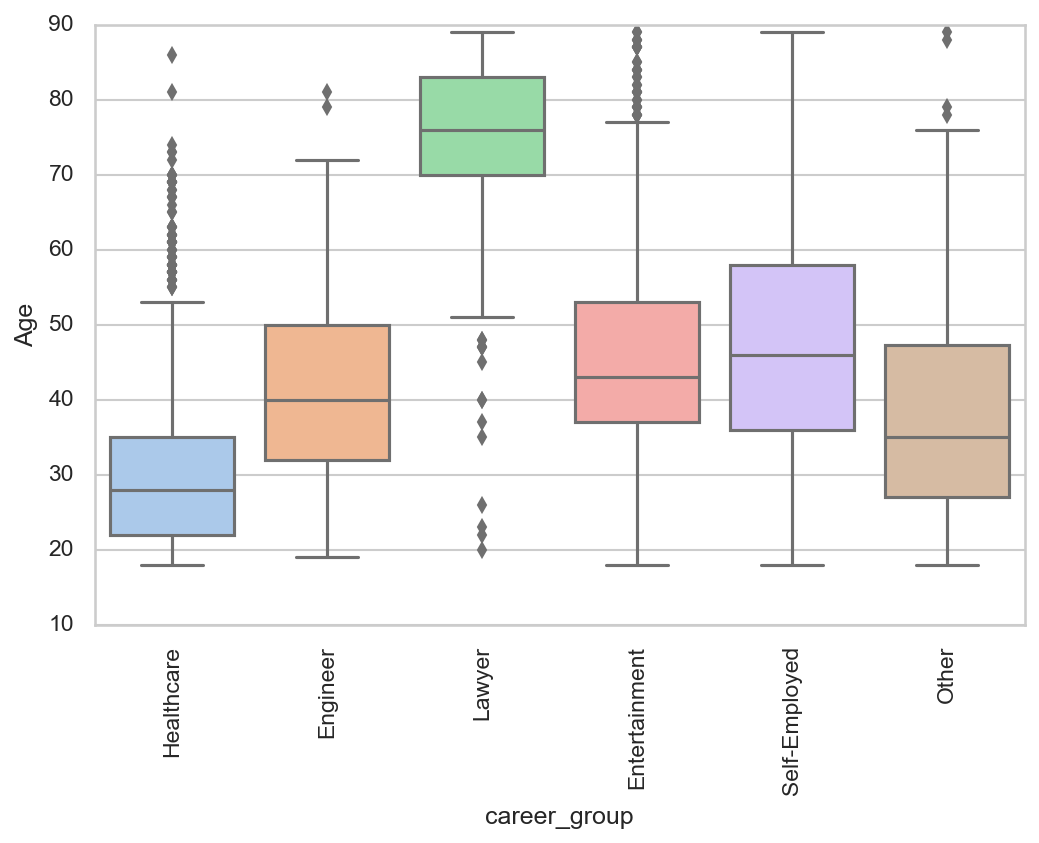

In [72]:
plt.figure(figsize=(8, 5), dpi=150)
ax = sns.boxplot(x="career_group", y="Age", data=df_merge)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

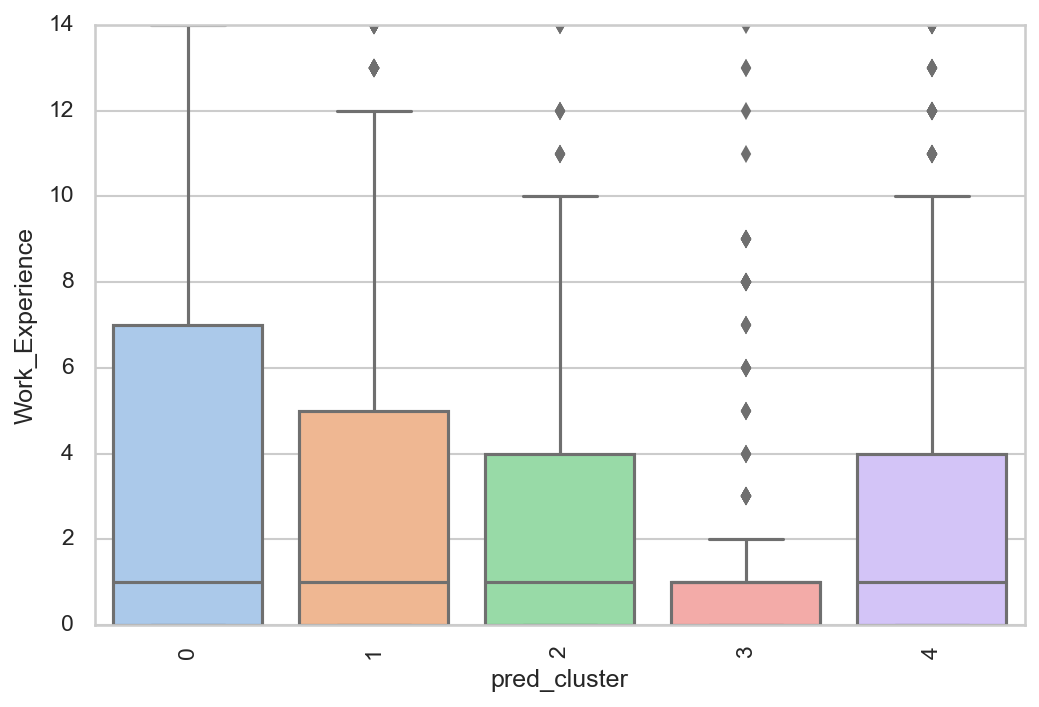

In [73]:
plt.figure(figsize=(8, 5), dpi=150)
ax = sns.boxplot(x="pred_cluster", y="Work_Experience", data=df_merge)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

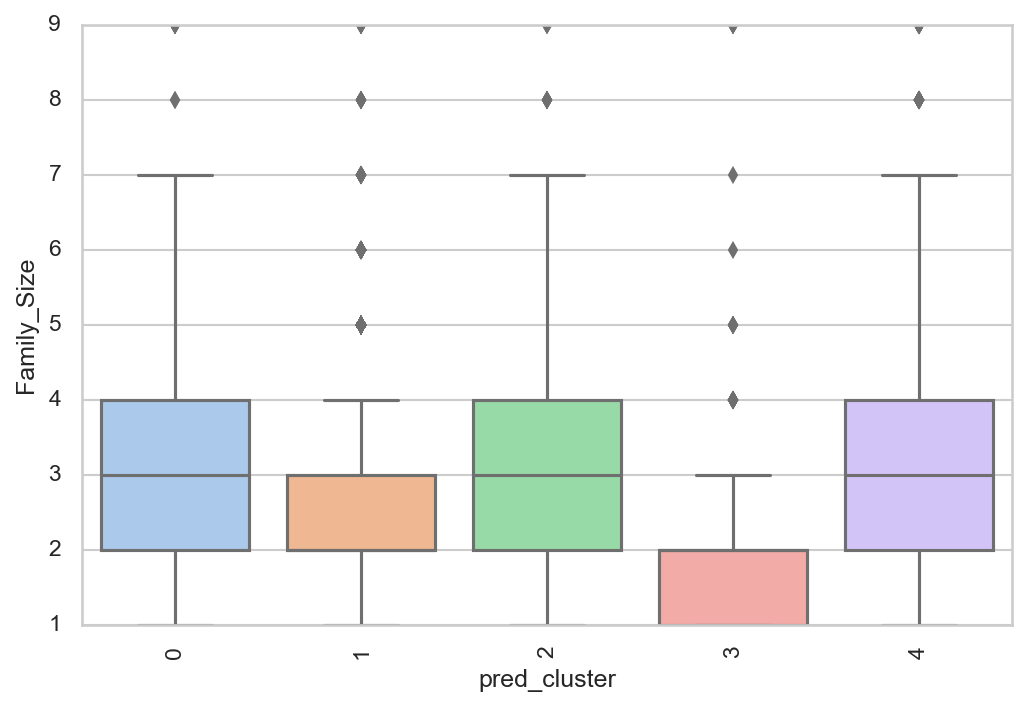

In [74]:
plt.figure(figsize=(8, 5), dpi=150)
ax = sns.boxplot(x="pred_cluster", y="Family_Size", data=df_merge)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)

plt.show()

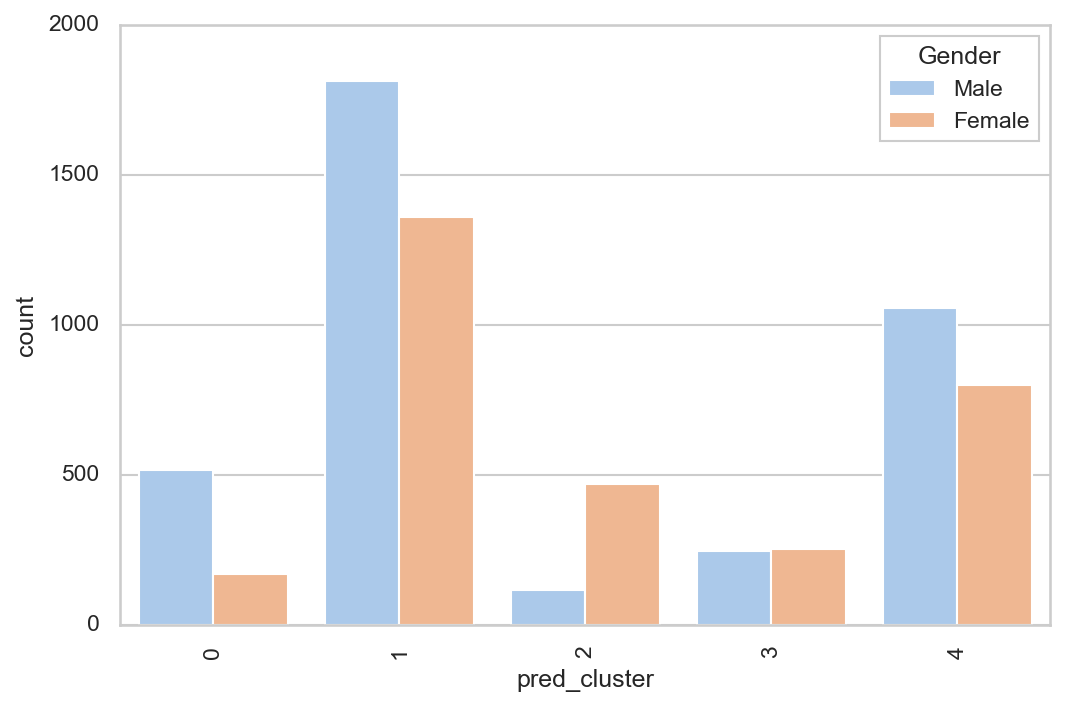

In [76]:
plt.figure(figsize=(8, 5), dpi=150)
ax = sns.countplot(x="pred_cluster", hue="Gender", data=df_merge)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

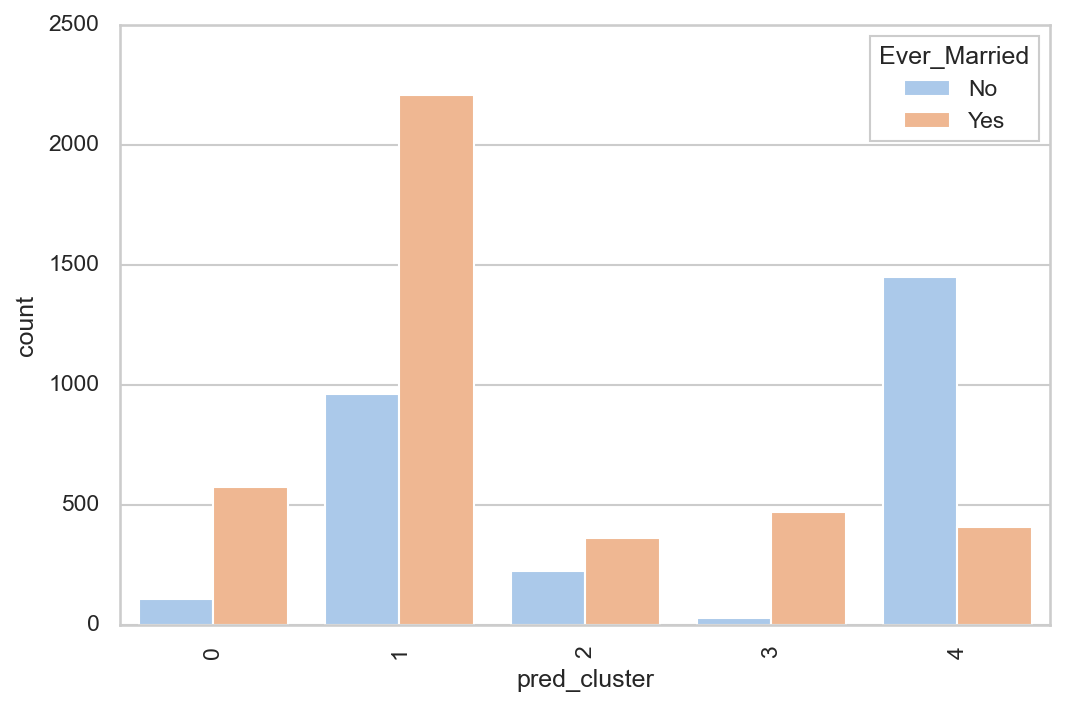

In [77]:
plt.figure(figsize=(8, 5), dpi=150)
ax = sns.countplot(x="pred_cluster", hue="Ever_Married", data=df_merge)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()

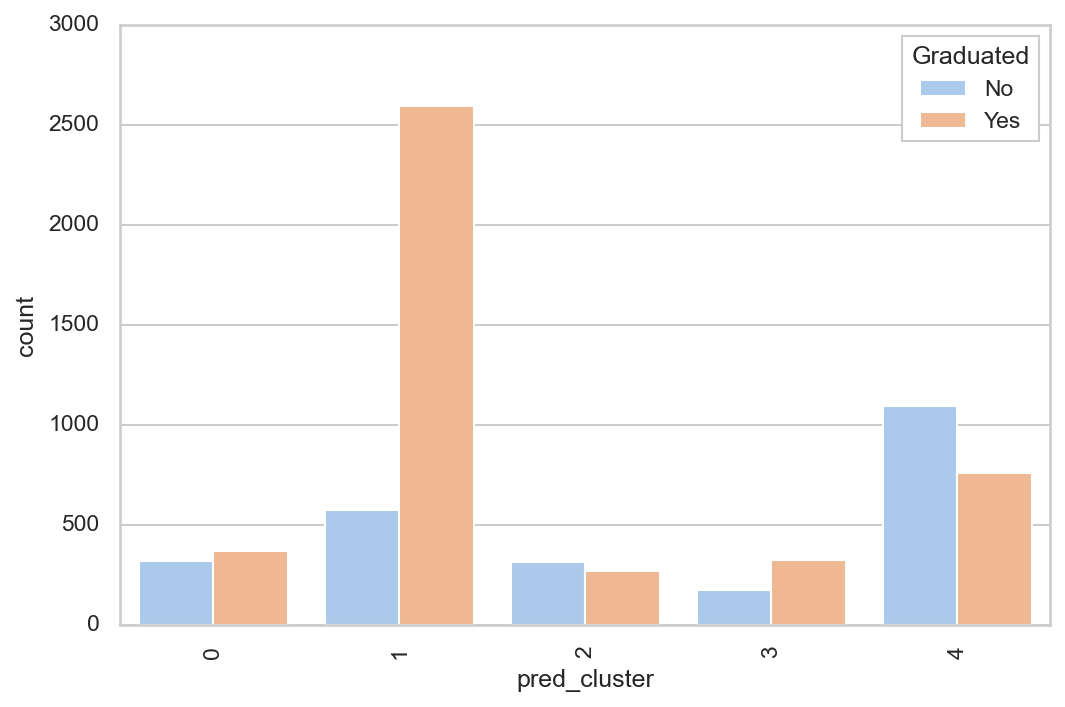

In [78]:
# Graduated
plt.figure(figsize=(8, 5), dpi=150)
ax = sns.countplot(x="pred_cluster", hue="Graduated", data=df_merge)
for tick in ax.get_xticklabels():
    tick.set_rotation(90)
plt.show()